Statistics: The Science of Decisions Project Instructions

Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.
Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.
1. What is our independent variable? What is our dependent variable?
2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
Now it’s your chance to try out the Stroop task for yourself. Go to this link, which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download this dataset which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.
3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.
4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.
5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?
6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

In [12]:
import pandas as pd
import numpy as np
import os

In [ ]:
os.getcwd()

In [3]:
ls

Data_Analyst_ND_Project0.ipynb      Test_a_perceptual_phenomenon.ipynb
README.md                           stroopdata.csv


In [4]:
data = 'stroopdata.csv'
stroop_data = pd.read_csv(data)

In [5]:
stroop_data

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


####1. What is our independent variable? What is our dependent variable?

Independent variable is was whether the word name and font color were the same (congruent words) or different (incongruent words).


Dependent variable is the time it takes to name the ink colors in equally-sized lists of words.

####2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Ho = The time it takes to name the ink colors in equally-sized lists are the same for both congruent words and incongruent words conditions at an alpha of .05

Ha = The time it takes to name the ink colors in equally-sized lists are different for congruent words and incongruent words conditions at an alpha of .05

We do not know population parameters such as mean and variance. We also compare only two set of samples. Therefore, t-test is the best statistical test. Since our participants were measured at two time points we will use paired T

In order to implement t-test, we need to calculate:

My test results:
Congruent : 10.39
Incongruent: 20.85

####3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [10]:
stroop_data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


There was 24 participants in the two tests. In the congruent words conditions, the range of data was from 8.63 to 22.33, the mean was 14.05 and the standard deviation (std) was 3.56. In the incongruent words conditions, the range of the data was from 15.69 to 35.26, the mean was 22.02 and standard deviation (std) was 4.80.

####4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
# can set bin by using , bins=np.arange(min(data), max(data) + binwidth, binwidth)
h = sorted(stroop_data['Congruent'])
def dis_plot(h):
    fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting 
    plt.plot(h,fit,'-o')
    plt.hist(h,normed=True)      #use this to draw histogram of your data
    plt.xlabel('Time')
    plt.ylabel('Percentage of Participants')
    plt.show()
# Reference: http://stackoverflow.com/questions/20011494/plot-normal-distribution-with-matplotlib

#####4.1 Distribution of Congruent Data:

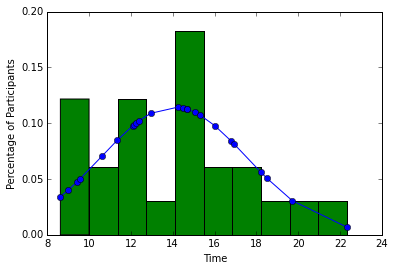

In [76]:
h_con = sorted(stroop_data['Congruent'])
dis_plot(h_con)

#####4.2 Distribution of Incongruent Data:

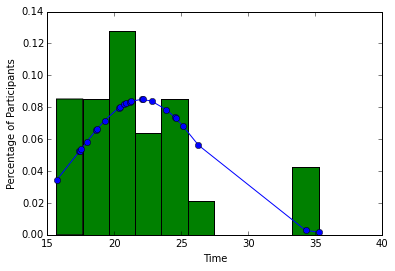

In [57]:
h_incon = sorted(stroop_data['Incongruent'])
dis_plot(h_incon)

We could see that the data of congruent test was normal distribution (Fig.1). The data of incongruent test is also almost normal distribution with two data had about 3 standard deviation above the mean which sketch the distribution a bit to the right. Nevertheles, we can conclude that both data sets have normal distributions. 

####5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [82]:
from scipy import stats
a = stroop_data['Congruent']
b = stroop_data['Incongruent']
t, p = stats.ttest_ind(a, b, equal_var=False)
print "ttest_ind: t = %g  p = %g" % (t, p)
# Reference: http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

ttest_ind: t = -6.53225  p = 6.51017e-08


In [84]:
from scipy import stats
a = stroop_data['Congruent']
b = stroop_data['Incongruent']
t, p = stats.ttest_rel(a, b)
print "ttest_ind: t = %g  p = %g" % (t, p)

ttest_ind: t = -8.02071  p = 4.103e-08
